In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import numpy as np

In [2]:
filename = '../data/K19 UAS IKBSR 22-25hpi 260818_3_Position003 SR.csv'
dataframe = pd.read_csv(filename,header=1)

In [3]:
# preview the structure of the data
dataframe[:5]

,Time [s],Position X::1000010216,Position X::1000010217,Position X::1000010218,Position X::1000010219,Position X::1000010220,Position X::1000010221,Position X::1000010222,Position X::1000010223,Position X::1000010224,...,Position Z::1000010221,Position Z::1000010222,Position Z::1000010223,Position Z::1000010224,Position Z::1000010225,Position Z::1000014736,Position Z::1000014739,Position Z::1000014918,Position Z::1000015244,Position Z::1000015689
0,0.00,461.879,506.239,291.122,426.503,104.268,16.28520,354.774,99.8274,322.417,...,1718.62,1710.89,1712.48,1704.25,1708.32,NaN,NaN,NaN,NaN,NaN
1,89.99,461.102,517.114,294.379,421.396,110.358,12.56020,354.085,95.8863,322.865,...,1719.10,1710.76,1711.26,1704.28,1710.95,NaN,NaN,NaN,NaN,NaN
2,179.97,458.265,515.063,297.346,417.860,118.852,15.15840,350.159,90.1726,323.652,...,1718.03,1710.34,1711.79,1704.50,1712.72,NaN,NaN,NaN,NaN,NaN
3,269.97,458.160,513.753,295.496,414.271,118.397,10.38680,346.096,88.3431,333.134,...,1715.90,1709.77,1712.21,1705.06,1713.03,NaN,NaN,NaN,NaN,NaN
4,359.98,460.406,509.671,296.445,410.070,114.465,5.39082,340.650,89.3141,336.076,...,1715.88,1709.98,1712.33,1704.53,1712.18,NaN,NaN,NaN,NaN,NaN


In [4]:
# extract the track IDs
rawnames = list(dataframe)
rawnames = rawnames[1:]
rawnames = [n.replace('Position ','') for n in rawnames]
trackIDs = np.unique([n.replace('X::','').replace('Y::','').replace('Z::','') for n in rawnames])
num_tracks = len(trackIDs)
num_timepoints = len(dataframe['Time [s]'].values)
num_tracks, num_timepoints

(15, 140)

In [5]:
reshapeddata = pd.DataFrame({'trackID':np.repeat(trackIDs,num_timepoints),
                             'time':np.tile(dataframe['Time [s]'],num_tracks),
                             'x':dataframe.values[:,1:num_tracks+1].reshape((num_tracks*num_timepoints,),order='F'),
                             'y':dataframe.values[:,num_tracks+1:2*num_tracks+1].reshape((num_tracks*num_timepoints,),order='F'),
                             'z':dataframe.values[:,2*num_tracks+1:3*num_tracks+1].reshape((num_tracks*num_timepoints,),order='F')})

In [6]:
reshapeddata

,trackID,time,x,y,z
0,1000010216,0.00,461.87900,407.113,1735.50
1,1000010216,89.99,461.10200,407.318,1735.76
2,1000010216,179.97,458.26500,403.118,1733.03
3,1000010216,269.97,458.16000,401.793,1732.20
4,1000010216,359.98,460.40600,403.691,1733.22
5,1000010216,449.98,460.68000,404.182,1733.30
6,1000010216,539.97,460.04300,403.167,1732.66
7,1000010216,629.95,457.84300,397.429,1728.18
8,1000010216,719.99,456.03700,389.125,1722.00
9,1000010216,809.95,464.21200,380.992,1715.49


In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [8]:
from inference.walker_inference import BiasedPersistentInferer, prepare_paths

In [9]:
from in_silico.sources import PointSource

(-27.181777450000006, 591.2076084500001, 88.4732, 438.9728)

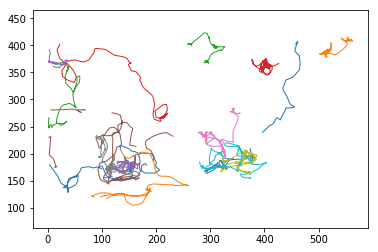

In [10]:
fig1 = plt.figure()
for ID, tracks in reshapeddata.groupby('trackID'):
        plt.plot(tracks['x'], tracks['y'], lw=1)
plt.axis('equal')

In [11]:
fig1.savefig('tracks_SR.pdf')

In [12]:
inf = BiasedPersistentInferer(prepare_paths([paths[['x', 'y']].values for id, paths in reshapeddata.groupby('trackID')], include_t=False), PointSource((300, 300)))


In [13]:
out = inf.multi_infer(n_walkers=20, n_steps=20000, burn_in=10000)

Beginning MCMC walk in parallel


100%|██████████| 30000/30000 [00:31<00:00, 944.77it/s] 


Completed MCMC walk in 32.11s


In [14]:
from utils.plotting import plot_wpb_dist

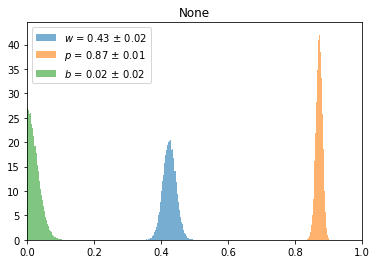

In [15]:
plot_wpb_dist(out,save_as="postis_SR.pdf")